# Prelucrarea Semnalelor
## Laborator 3
### Miu Elena Adania
### Grupa 333

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Ex1
### Pentru N = 8 creati matricea Fourier. Desenati pe subplot-uri diferite pentru fiecare linie partea reala si partea imaginara. Verificati ca matricea Fourier este ortogonala.

In [67]:
N = 8

F = np.zeros((N, N), dtype=complex)
F_real = np.zeros((N, N))
F_img = np.zeros((N, N), dtype=complex)

for m in range(N):
    for k in range(N):
        F_real[m][k] = np.cos(2 * np.pi * m * k / N)
        F_img[m][k] = -1j * np.sin(2 * np.pi * m * k / N)
        F[m][k] = F_real[m][k] + F_img[m][k]

In [68]:
F_conj = np.conj(F.T)
result = np.dot(F, F_conj)

if np.allclose(result, N * np.eye(N)):
    print("Matricea Fourier este ortogonala.")
else:
    print("Matricea Fourier nu este ortogonala.")

Matricea Fourier este ortogonala.


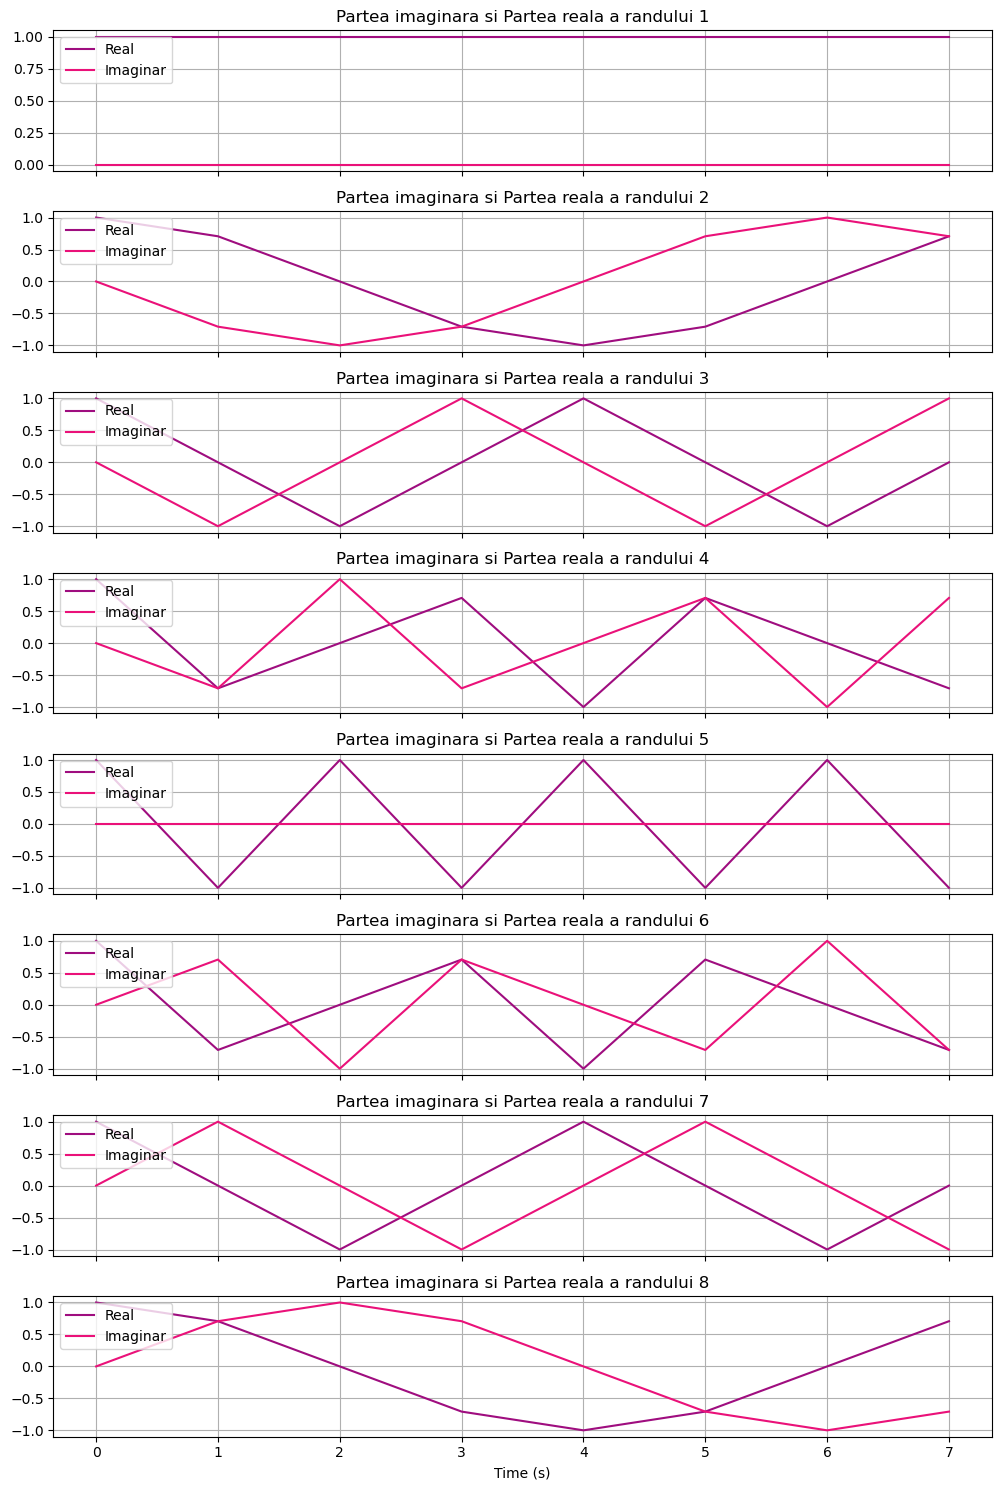

In [73]:
figure, axes = plt.subplots(N, sharex=True, figsize=(10, 15))

for m in range(N):
    axes[m].plot(np.real(F[m]), color='#9F0D7F', label="Real")
    axes[m].plot(np.imag(F[m]), color='#EA1179', label="Imaginar")
    axes[m].set_title(f'Partea imaginara si Partea reala a randului {m + 1}')
    axes[m].legend(loc='upper left')
    
axes[N - 1].set_xlabel('Time (s)')

for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()                                                    

## Ex2.
### Realizati graficele 1 si 2 din indrumar pentru un semnal sinusoidal cu o frecventa aleasa de voi, alta decat cea utilizata aici. 
### Reamintim ca graficul din dreapta din Figura 1 reprezinta infasurarea semnalului pe cercul unitate, anume reprezentarea in planul complex a y[n] = x[n]e^−2πjn.
### De asemeana, Figura 2 arata influenta diferitelor frecvente de infasurare asupra formei pe care o are aceasta reprezentare.
### Se va afisa grafic z[ω] = x[n]e^−2πjωn, pentru patru valori diferite ale ω, dintre care una egala cu frecventa semnalului.
### Realizati graficele 1 si 2 din acest indrumar astfel incat culoarea graficului sa fie o functie de distanta de la origine.

In [74]:
def signal(t):
    frequency = 5
    s = np.sin(2 * np.pi * frequency * t)
    return s

samples = np.arange(-1, 1, 0.001)
x_list = list(map(signal, samples))

In [75]:
def f(samples, w, n):
    return samples(n) * math.e ** (2 * np.pi * 1j * w * n)

In [76]:
w_list = [1, 1, 2, 5, 7]

N = int((len(w_list) + 1) / 2)

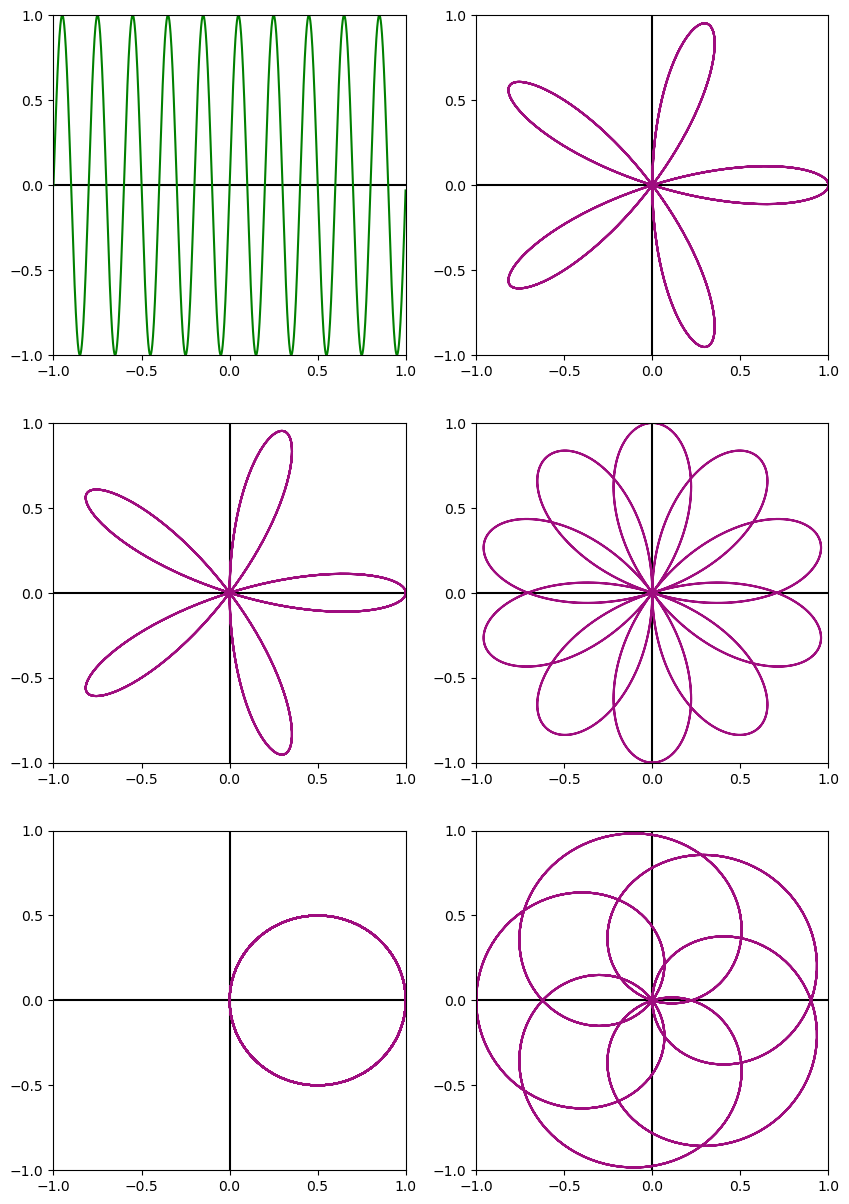

In [78]:
figure, axes = plt.subplots(N, 2, figsize=(10, 15))

axes = axes.flatten()

for ax in axes:
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    
    ax.set_xticks([-1, -0.5, 0, 0.5, 1])
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    
    ax.axhline(0, color='black')
    if ax != axes[0]:
        ax.axvline(0, color='black')
    
axes[0].plot(samples, x_list, color="green")

for i, elem in enumerate(w_list):
    points = list(map(lambda n: f(signal, elem, n), samples))
    reals = [e.real for e in points]
    imags = [e.imag for e in points]
    axes[i+1].plot(imags, reals, color="#9F0D7F")
    
plt.show()